In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
sb.set_context("talk")
import sys
print('python', sys.version)
print('pandas', pd.__version__)
print('statsmodels', sm.version.full_version)

Populating the interactive namespace from numpy and matplotlib
python 3.4.1 (default, May 19 2014, 13:10:29) 
[GCC 4.2.1 Compatible Apple LLVM 5.1 (clang-503.0.40)]
pandas 0.16.0
statsmodels 0.6.1


http://www.manipulandodados.com.br/2015/03/Como-utilizar-teste-t-student-duas-amostras.html
http://www.manipulandodados.com.br/2015/03/entenda-o-que-e-p-valor-como-usar.html

In [9]:
ss = pd.read_csv("https://raw.githubusercontent.com/wilsonfreitas/saosilvestre/master/saosilvestre-lf.csv")

In [12]:
ss = ss.drop(['largada', 'chegada', 'horario'], 1)
ss.head()

,nome,pais,corrida,ano,tempo,percurso,data,pace,sexo
0,Alfredo Gomes,Brasil,1,1925,23.166667,6200,1925-12-31 12:00:00,3.736559,masculino
1,Jorge Mancebo,Brasil,2,1926,22.533333,6200,1926-12-31 12:00:00,3.634409,masculino
2,Heitor Blasi,Itália,3,1927,23.000000,6200,1927-12-31 12:00:00,3.709677,masculino
3,Salim Maluf,Brasil,4,1928,29.183333,8800,1928-12-31 12:00:00,3.316288,masculino
4,Heitor Blasi,Itália,5,1929,29.183333,8800,1929-12-31 12:00:00,3.316288,masculino


agrupando por país e sexo

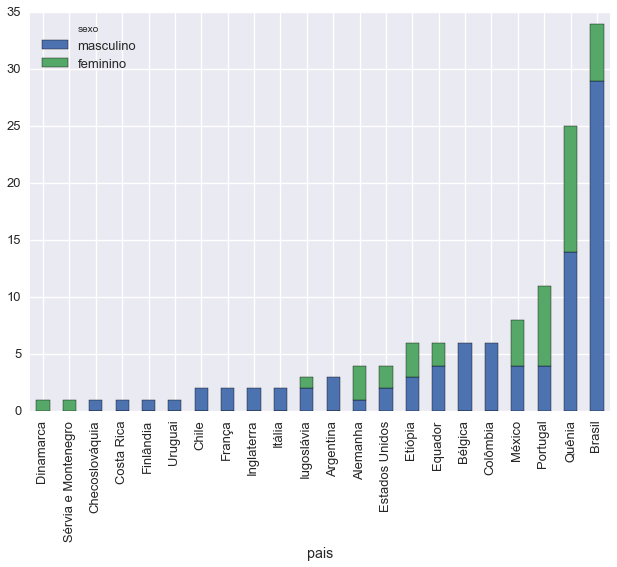

In [30]:
ss_pais = ss.groupby(['pais', 'sexo'])\
    .sexo\
    .count()\
    .unstack()\
    .fillna(0)
ss_pais['total'] = ss_pais['masculino'] + ss_pais['feminino']
ss_pais.sort(['total', 'masculino'], inplace=True)
ss_pais[['masculino', 'feminino']].plot(kind='bar', stacked=True);

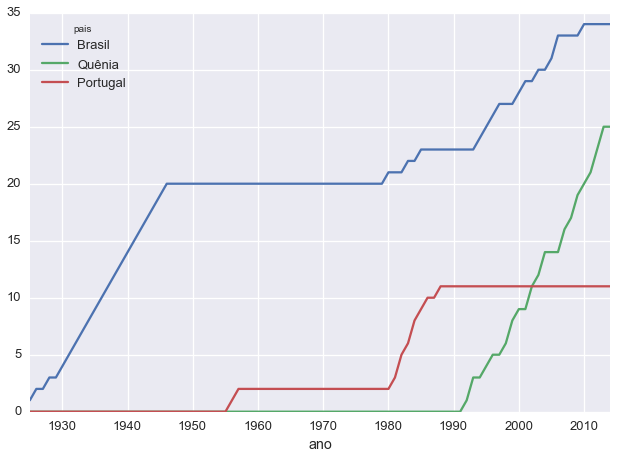

In [33]:
ss.groupby(['ano', 'pais'])\
    .corrida\
    .count()\
    .unstack()[['Brasil', 'Quênia', 'Portugal']]\
    .fillna(0)\
    .cumsum()\
    .plot();

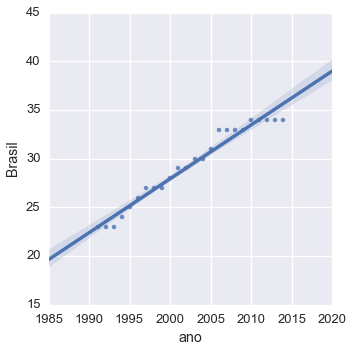

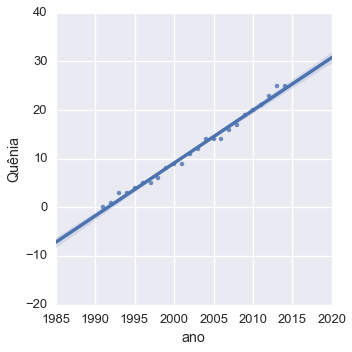

In [71]:
ss_vic = ss.groupby(['ano', 'pais'])\
    .corrida\
    .count()\
    .unstack()\
    .fillna(0)\
    .cumsum()

sb.lmplot('ano', 'Brasil', ss_vic.loc[ss_vic.index > 1990, 'Brasil'].reset_index(level=0));
sb.lmplot('ano', 'Quênia', ss_vic.loc[ss_vic.index > 1990, 'Quênia'].reset_index(level=0));

Fazendo gráficos com *pace*

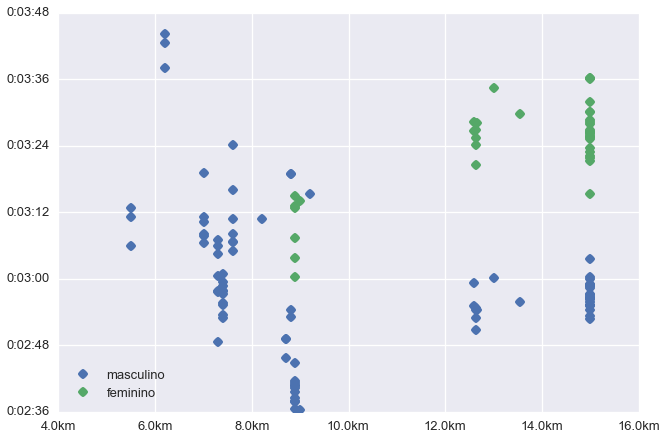

In [49]:
ss_pace = ss[['sexo', 'ano', 'pace', 'percurso']]

mas = ss_pace.query('sexo == "masculino"')
fem = ss_pace.query('sexo == "feminino"')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mas.percurso, mas.pace, 'o', label='masculino')
ax.plot(fem.percurso, fem.pace, 'o', label='feminino')

dist_fmt = matplotlib.ticker.FuncFormatter(lambda x, p: str(x/1000) + "km")
pace_fmt = matplotlib.ticker.FuncFormatter(lambda x, p: str(datetime.timedelta(minutes=x)))

ax.xaxis.set_major_formatter(dist_fmt)
ax.yaxis.set_major_formatter(pace_fmt)

plt.legend(loc=3)
plt.show()

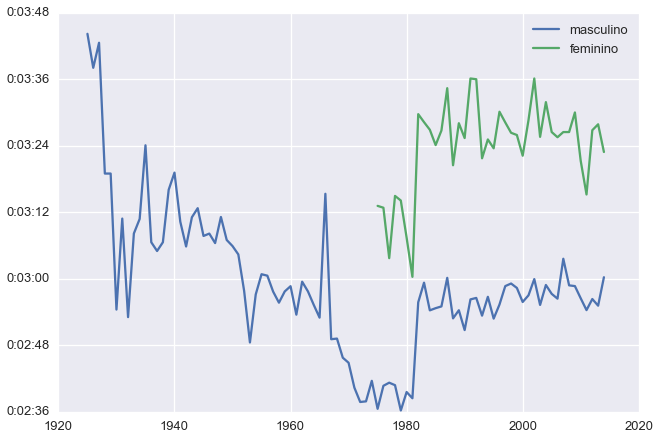

In [54]:
ss_long = ss #.query('percurso >= 12000')

mas = ss_long.query('sexo == "masculino"')
fem = ss_long.query('sexo == "feminino"')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mas.ano, mas.pace, label='masculino')
ax.plot(fem.ano, fem.pace, label='feminino')

pace_fmt = matplotlib.ticker.FuncFormatter(lambda x, p: str(datetime.timedelta(minutes=x)))

ax.yaxis.set_major_formatter(pace_fmt)

plt.legend()
plt.show()

Carregando os dados de temperatura

In [79]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
temp = pd.read_csv("https://raw.githubusercontent.com/wilsonfreitas/saosilvestre/master/temperatura.csv",
                   parse_dates=['Data'],
                   date_parser=dateparse)

In [80]:
temp.dtypes

Data                    datetime64[ns]
TempMaximaMedia                float64
TempCompensadaMedia            float64
TempMinimaMedia                float64
UmidadeRelativaMedia           float64
dtype: object

In [82]:
temp.head()

,Data,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia
0,1961-12-31,27.177419,20.721290,17.083871,81.185484
1,1962-12-31,24.483871,19.985161,17.106452,87.024194
2,1963-12-31,26.806452,20.597419,16.641935,75.088710
3,1964-12-31,24.516129,19.642581,16.338710,83.532258
4,1965-12-31,26.412903,21.985161,19.000000,81.612903


In [83]:
temp['Ano'] = temp.Data.apply(lambda x: x.year)

In [84]:
temp.head()

,Data,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,Ano
0,1961-12-31,27.177419,20.721290,17.083871,81.185484,1961
1,1962-12-31,24.483871,19.985161,17.106452,87.024194,1962
2,1963-12-31,26.806452,20.597419,16.641935,75.088710,1963
3,1964-12-31,24.516129,19.642581,16.338710,83.532258,1964
4,1965-12-31,26.412903,21.985161,19.000000,81.612903,1965


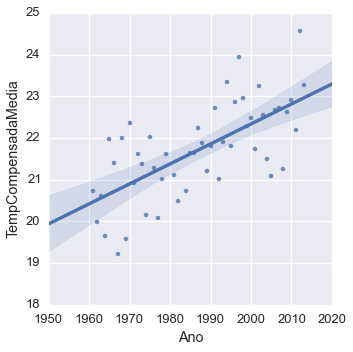

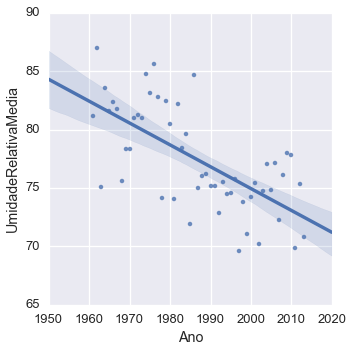

In [86]:
sb.lmplot('Ano', 'TempCompensadaMedia', temp);
sb.lmplot('Ano', 'UmidadeRelativaMedia', temp);

In [88]:
ss_temp = pd.merge(ss, temp, left_on='ano', right_on='Ano')
ss_temp.head().transpose()

,0,1,2,3,4
nome,Martin Hyman,Hamoud Ameur,Henry Clerckx,Gaston Roelants,Gaston Roelants
pais,Inglaterra,França,Bélgica,Bélgica,Bélgica
corrida,37,38,39,40,41
ano,1961,1962,1963,1964,1965
tempo,21.4,22.13333,21.91667,21.61667,21.33333
percurso,7400,7400,7400,7400,7400
data,1961-12-31 12:00:00,1962-12-31 12:00:00,1963-12-31 12:00:00,1964-12-31 12:00:00,1965-12-31 12:00:00
pace,2.891892,2.990991,2.961712,2.921171,2.882883
sexo,masculino,masculino,masculino,masculino,masculino
Data,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00,1965-12-31 00:00:00


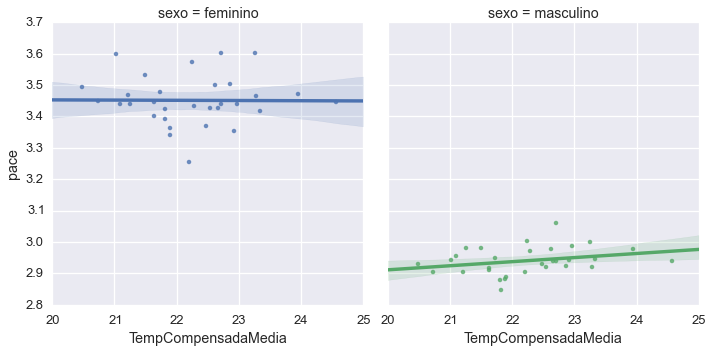

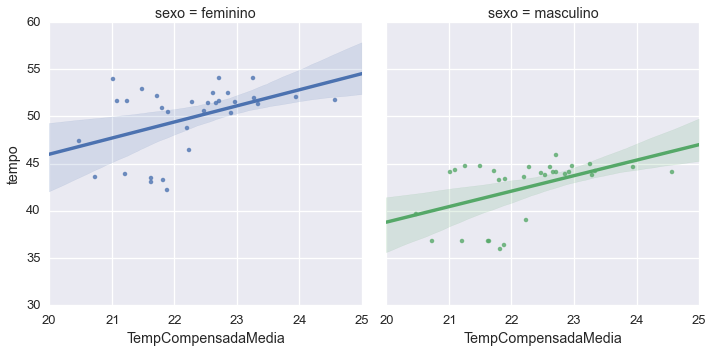

In [94]:
ss_long = ss_temp[ss_temp.percurso >= 12000]
sb.lmplot('TempCompensadaMedia', 'pace', ss_long, hue='sexo', col='sexo');
sb.lmplot('TempCompensadaMedia', 'tempo', ss_long, hue='sexo', col='sexo');

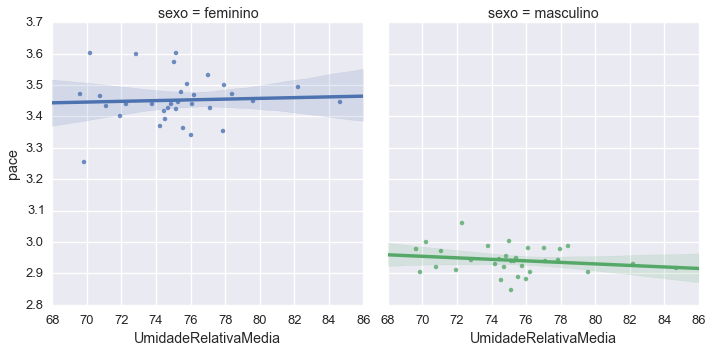

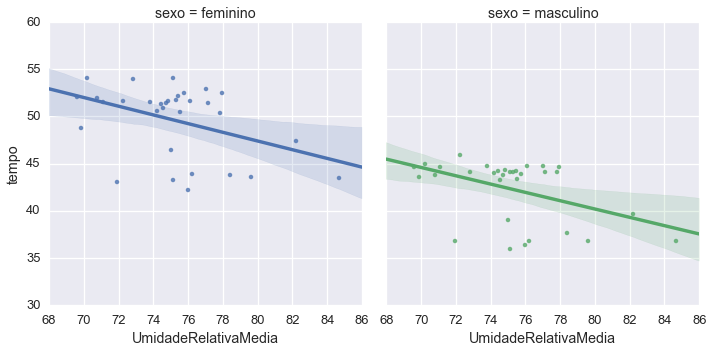

In [95]:
sb.lmplot('UmidadeRelativaMedia', 'pace', ss_long, hue='sexo', col='sexo');
sb.lmplot('UmidadeRelativaMedia', 'tempo', ss_long, hue='sexo', col='sexo');

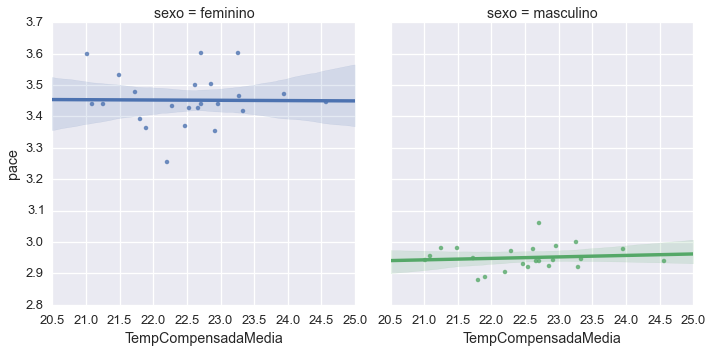

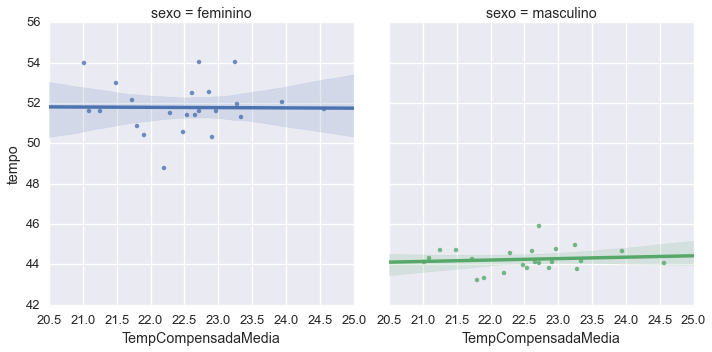

In [96]:
ss_long = ss_temp[ss_temp.percurso >= 15000]
sb.lmplot('TempCompensadaMedia', 'pace', ss_long, hue='sexo', col='sexo');
sb.lmplot('TempCompensadaMedia', 'tempo', ss_long, hue='sexo', col='sexo');

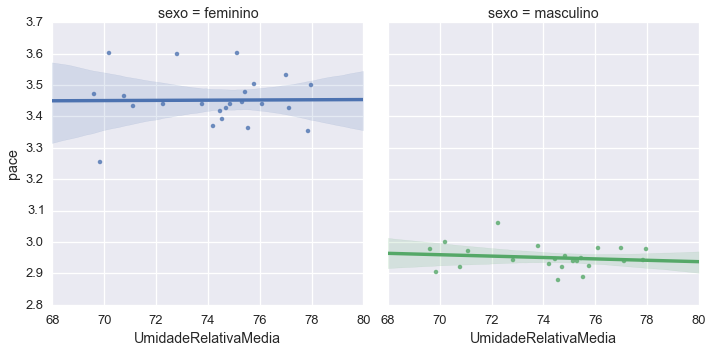

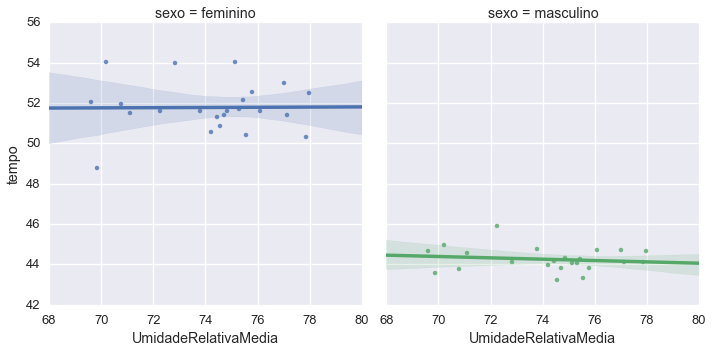

In [97]:
sb.lmplot('UmidadeRelativaMedia', 'pace', ss_long, hue='sexo', col='sexo');
sb.lmplot('UmidadeRelativaMedia', 'tempo', ss_long, hue='sexo', col='sexo');

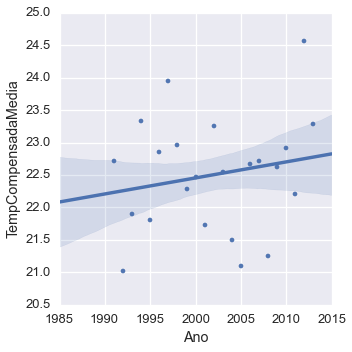

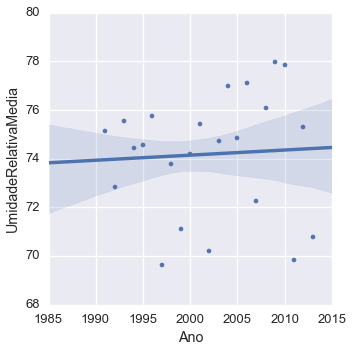

In [98]:
sb.lmplot('Ano', 'TempCompensadaMedia', ss_long);
sb.lmplot('Ano', 'UmidadeRelativaMedia', ss_long);

In [101]:
ss_temp_aux = ss_long.query('sexo == "masculino"')
X = ss_temp_aux.TempCompensadaMedia
X = sm.add_constant(X)
y = ss_temp_aux.pace
mod = sm.OLS(y, X, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   pace   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.2390
Date:                Sat, 02 May 2015   Prob (F-statistic):              0.630
Time:                        18:31:15   Log-Likelihood:                 42.508
No. Observations:                  23   AIC:                            -81.02
Df Residuals:                      21   BIC:                            -78.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   2.8442    

In [103]:
X = ss_temp_aux.UmidadeRelativaMedia
X = sm.add_constant(X)
y = ss_temp_aux.pace
mod = sm.OLS(y, X, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   pace   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.4351
Date:                Sat, 02 May 2015   Prob (F-statistic):              0.517
Time:                        18:31:35   Log-Likelihood:                 42.614
No. Observations:                  23   AIC:                            -81.23
Df Residuals:                      21   BIC:                            -78.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    3.1147 